# 1. Importing Libraries

In [232]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc , precision_score , classification_report
from sklearn.linear_model import LogisticRegression
# from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno 

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import os 

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [234]:
# matplotlib setting
plt.rc('font', size=12) 
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12) 
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12) 
plt.rc('legend', fontsize=12) 
plt.rc('figure', titlesize=7) 
plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.set_palette(sns.xkcd_palette(colors))

# 2. EDA

In [235]:
df = pd.read_csv("D:/github files/Churn_prediction_hackathon/original_data/train_PDjVQMB.csv").drop('ID',1)
df.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [236]:
df.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 6650 non-null   int64  
 1   Gender              6650 non-null   object 
 2   Income              6650 non-null   object 
 3   Balance             6650 non-null   float64
 4   Vintage             6650 non-null   int64  
 5   Transaction_Status  6650 non-null   int64  
 6   Product_Holdings    6650 non-null   object 
 7   Credit_Card         6650 non-null   int64  
 8   Credit_Category     6650 non-null   object 
 9   Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 519.7+ KB


In [238]:
df.shape

(6650, 10)

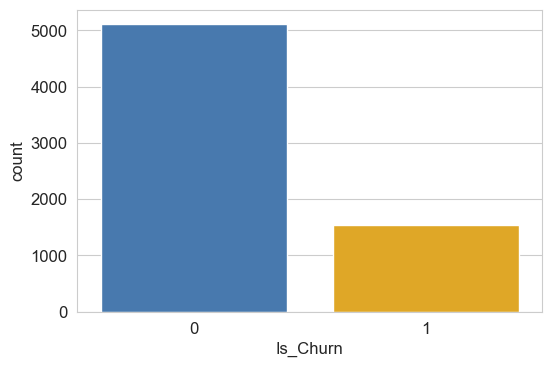

In [239]:
sns.countplot(data = df, x = 'Is_Churn')
plt.show()

In [240]:
df.Is_Churn.value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

# Total Distribution

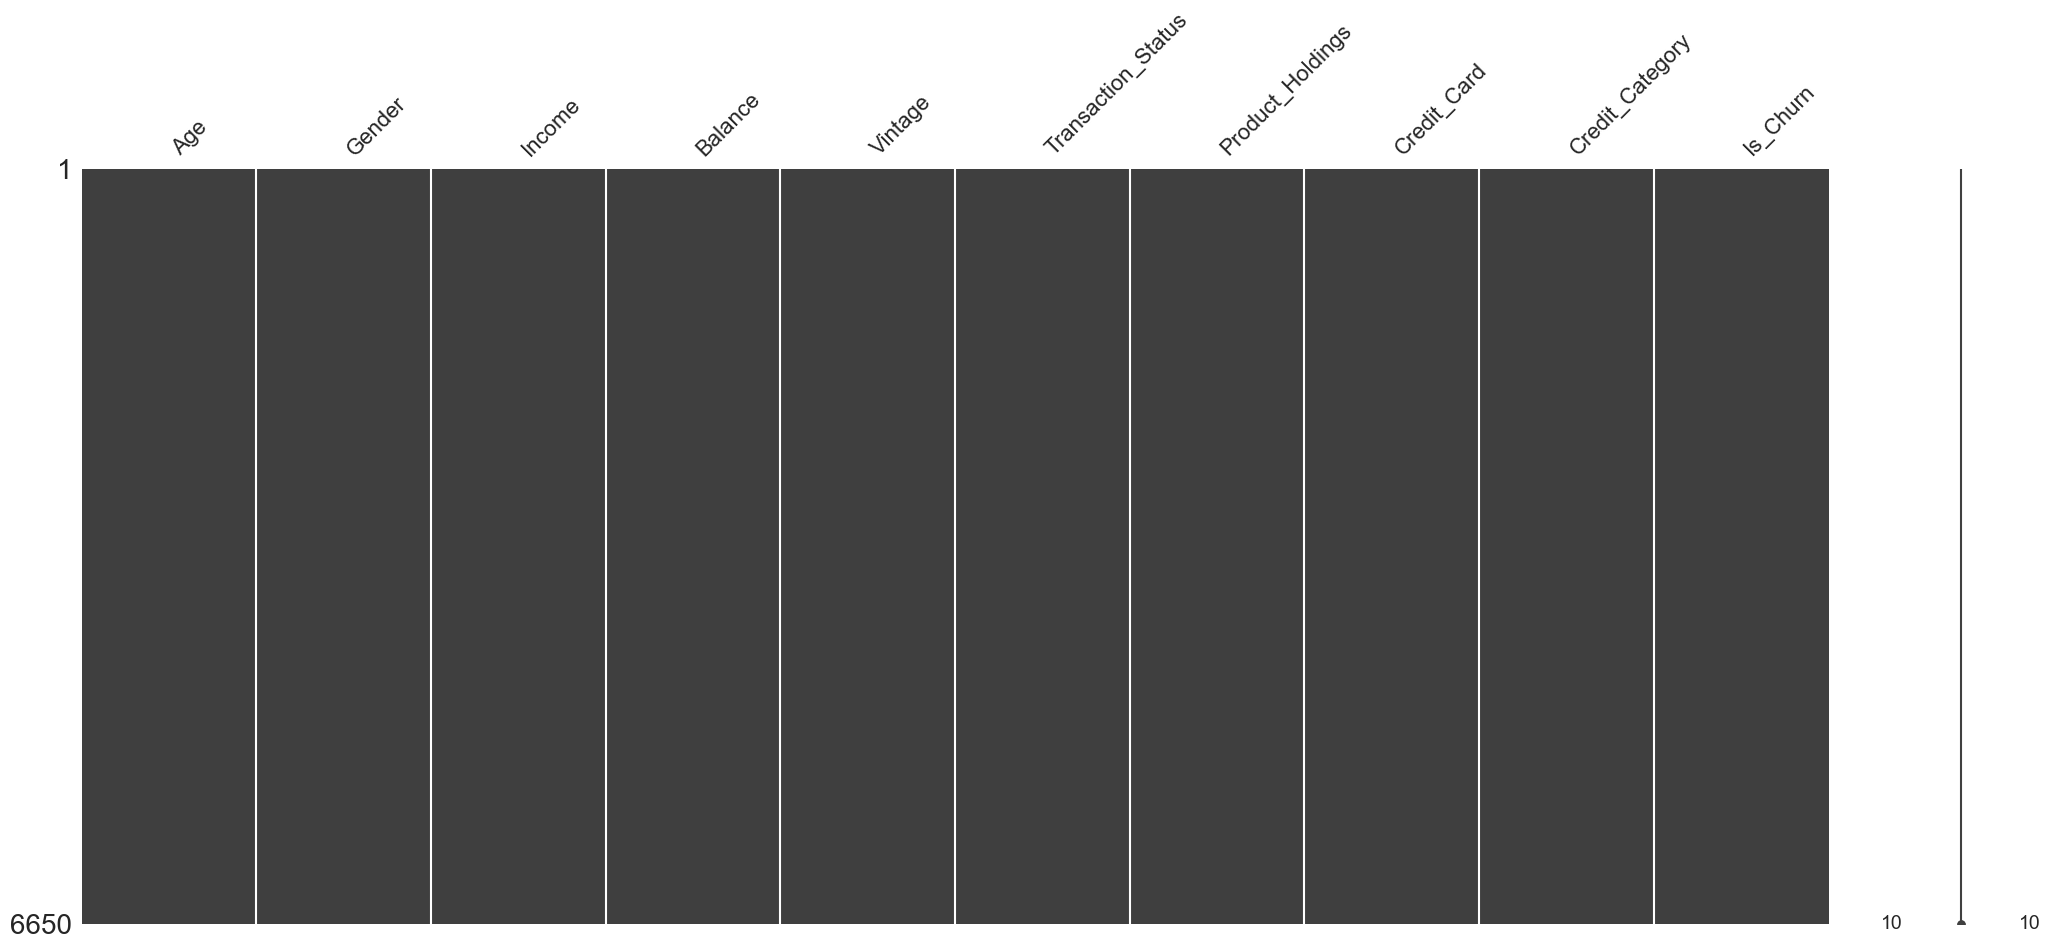

In [143]:
msno.matrix(df)
plt.show()

* Observation : There is no missing value

### 2.1 EDA of Numerical Values

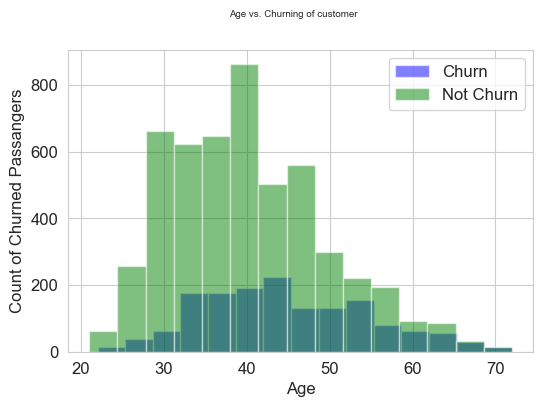

In [144]:
fig, ax = plt.subplots()

ax.hist(df[df["Is_Churn"]==1]["Age"], bins=15, alpha=0.5, color="blue", label="Churn")
ax.hist(df[df["Is_Churn"]==0]["Age"], bins=15, alpha=0.5, color="green", label="Not Churn")

ax.set_xlabel("Age")
ax.set_ylabel("Count of Churned Passangers")

fig.suptitle("Age vs. Churning of customer")

ax.legend()
plt.show()

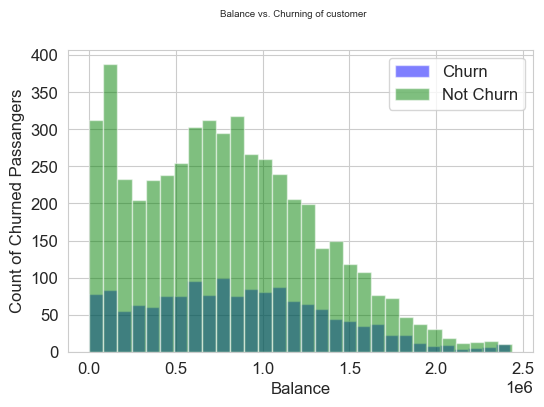

In [145]:
fig, ax = plt.subplots()

ax.hist(df[df["Is_Churn"]==1]["Balance"], bins=30, alpha=0.5, color="blue", label="Churn")
ax.hist(df[df["Is_Churn"]==0]["Balance"], bins=30, alpha=0.5, color="green", label="Not Churn")

ax.set_xlabel("Balance")
ax.set_ylabel("Count of Churned Passangers")

fig.suptitle("Balance vs. Churning of customer")

ax.legend()
plt.show()

### 2.2 EDA of Categorical Values

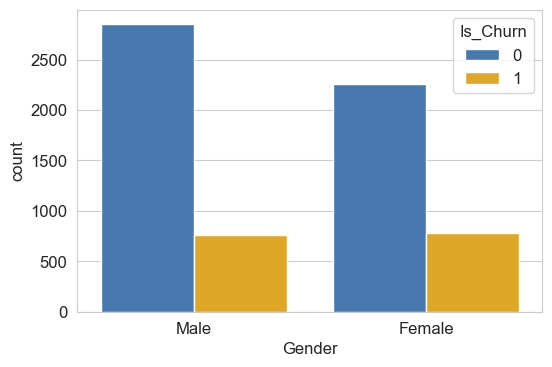

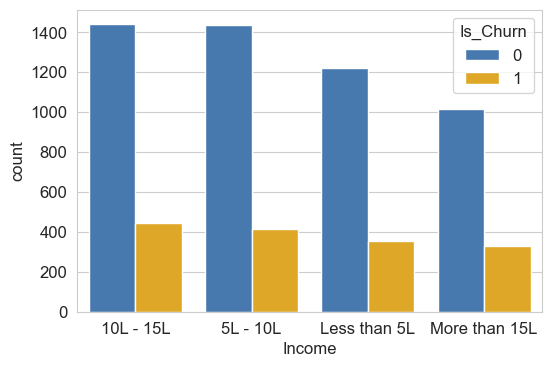

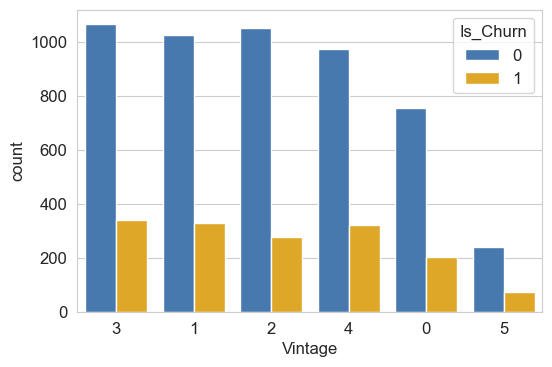

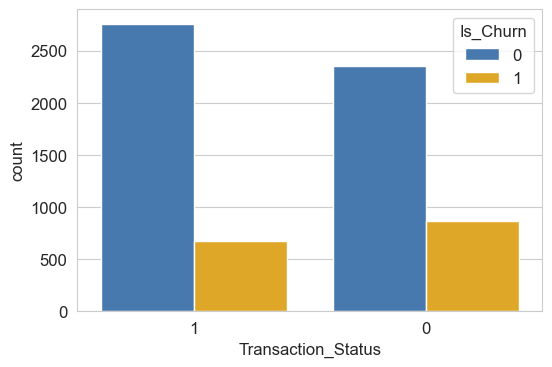

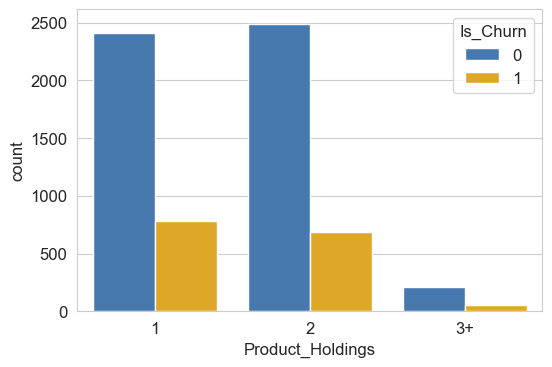

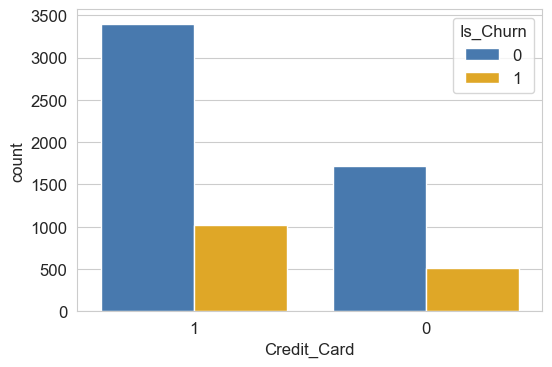

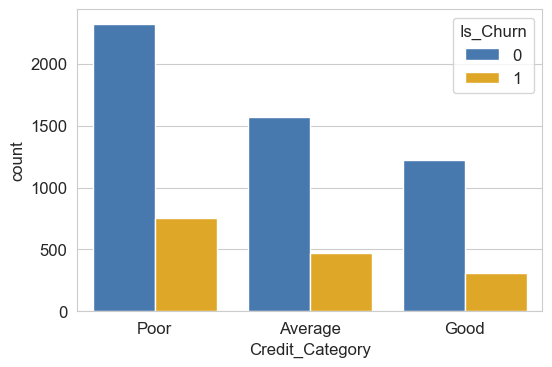

In [147]:
for i in ['Gender','Income','Vintage','Transaction_Status','Product_Holdings','Credit_Card','Credit_Category']:
    sns.countplot(i, hue='Is_Churn', data= df, order=df[i].value_counts().index)
    plt.show()
    

# 3. Feature Transformation

###  3.1 Label Encodings

In [148]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df.Gender= label_encoder.fit_transform(df.Gender)
df.Income = label_encoder.fit_transform(df.Income)
df.Credit_Category = label_encoder.fit_transform(df.Credit_Category)
df.Product_Holdings = label_encoder.fit_transform(df.Product_Holdings)
df.Vintage = label_encoder.fit_transform(df.Vintage)

In [149]:
df

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,0,1,563266.44,4,0,0,0,0,1
1,53,0,2,875572.11,2,1,0,1,2,0
2,35,0,3,701607.06,2,1,1,0,2,0
3,43,0,3,1393922.16,0,1,1,1,2,1
4,39,0,3,893146.23,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
6645,61,1,1,1354526.19,4,1,1,1,2,1
6646,42,0,1,596286.54,3,1,1,1,0,0
6647,29,1,2,979298.19,2,0,1,0,2,0
6648,66,0,0,395233.65,3,0,1,1,2,1


### 3.2 Train Test Split

In [150]:
X = df.drop('Is_Churn',1)
Y = df.Is_Churn
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.2,random_state=49)

### 3.3 Standard Scaling

In [151]:
cols = list(X_train.columns)
cols

['Age',
 'Gender',
 'Income',
 'Balance',
 'Vintage',
 'Transaction_Status',
 'Product_Holdings',
 'Credit_Card',
 'Credit_Category']

In [152]:
scalar = StandardScaler(with_mean=False)
scale_train = pd.DataFrame(scalar.fit_transform(X_train),columns=cols)
scale_test = pd.DataFrame(scalar.transform(X_test),columns=cols)

# 4. Machine Learning Models

### 4.1 Logistic Regression

### 4.1.1 Hyperparamerter Tuning of Model

In [70]:
LR = LogisticRegression(class_weight="balanced")
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5, scoring="f1_macro")

# fitting the model for grid search 
LR_search.fit(scale_train , y_train)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.575 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.563 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.570 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.557 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l1, solver=

[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.557 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.575 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.563 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.570 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.557 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=saga;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l1, solver=newton-c

[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.518 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.525 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.509 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=liblinear;, score=0.521 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.575 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.563 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.570 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.557 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=sag;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=saga;, score=0.575 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=

[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.573 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.566 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.568 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.560 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=lbfgs;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.531 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.542 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.551 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=liblinear;, score=0.547 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, sol

[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.566 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.568 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.560 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.573 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.566 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.568 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.560 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=0.531 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, sol

[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.557 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.571 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.549 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.573 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.566 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.568 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.560 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l2, solver=newton-cg;, score=0.563 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l2, solver=lbfgs;, score=0.573 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l2, solver=

[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=liblinear;, score=0.505 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=liblinear;, score=0.505 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.574 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.557 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.581 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=saga;, score=0.571 total time= 

[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=liblinear;, score=0.572 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=liblinear;, score=0.553 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.563 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=saga;, score=0.572 total time=   0.0s

[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=liblinear;, score=0.553 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.563 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.562 total time=   0.0s
[CV 1/5] 

[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.563 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.556 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.573 total time=   0.0s
[CV 2/5] 

[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.573 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.560 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.566 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] EN

[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.560 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=liblinear;, score=0.566 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=1

[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.560 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.566 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=1

[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=liblinear;, score=0.560 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=liblinear;, score=0.566 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=1

[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.573 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.562 total time=   0.0s
[CV 5/5] END C=

[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.562 total time=   0.0s
[CV 5/5] END C=

[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=liblinear;, score=0.569 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3

[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.573 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan total t

[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.573 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.568 total time=   0.0s

[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.567 total time=  

[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.573 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.562 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.565 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l2, solver=newton-cg;, score=0.573 total time=   0.0s
[CV 2/5] 

[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.567 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.568 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.572 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.567 to

[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l1, solver=saga;, score=0.562 total time= 

[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.562 total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.565 total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.573 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.567 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.568 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=saga;, score=0.562 total time= 

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1_macro', verbose=3)

### 4.1.2 Best Parameters of Logistic Regression

In [71]:
LR_search.best_params_
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Mean Accuracy: 0.567
Config: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


### 4.1.3 Fitting Logistic Regression with best Hyper parameters

In [85]:
best_lr = LogisticRegression(class_weight="balanced", C= 0.1, max_iter = 100, penalty = 'l2', solver = 'newton-cg')
best_lr.fit(scale_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', solver='newton-cg')

### 4.1.4 Evaluating on Test Data

F1 Macro ==> 0.4316877152698049


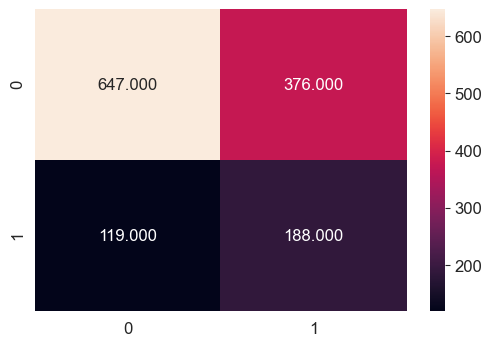

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      1023
           1       0.33      0.61      0.43       307

    accuracy                           0.63      1330
   macro avg       0.59      0.62      0.58      1330
weighted avg       0.73      0.63      0.66      1330



In [209]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
y_pred = best_lr.predict(scale_test)
print("F1 Macro ==>",f1_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.3f')
plt.show()
print("Classification Report")
print(classification_report(y_test,y_pred))

### 4.1.4 Finding best threshold for f1 macro

In [211]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
yhat = best_lr.predict_proba(scale_test)
probs = yhat[:, 1]
thresholds = np.arange(0, 1, 0.001)
scores = [f1_score(y_test, to_labels(probs, t),average='macro') for t in thresholds]
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.579, F-Score=0.58813


# 4.2 Naive Bayes

### 4.2.1 Hyperparamerter Tuning of Model

In [212]:
%%time
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=3, 
                 scoring='f1_macro') 
gs_NB.fit(scale_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .................var_smoothing=1.0;, score=0.435 total time=   0.0s
[CV 2/5] END .................var_smoothing=1.0;, score=0.435 total time=   0.0s
[CV 3/5] END .................var_smoothing=1.0;, score=0.435 total time=   0.0s
[CV 4/5] END .................var_smoothing=1.0;, score=0.435 total time=   0.0s
[CV 5/5] END .................var_smoothing=1.0;, score=0.435 total time=   0.0s
[CV 1/5] END ..var_smoothing=0.8111308307896871;, score=0.435 total time=   0.0s
[CV 2/5] END ..var_smoothing=0.8111308307896871;, score=0.435 total time=   0.0s
[CV 3/5] END ..var_smoothing=0.8111308307896871;, score=0.435 total time=   0.0s
[CV 4/5] END ..var_smoothing=0.8111308307896871;, score=0.435 total time=   0.0s
[CV 5/5] END ..var_smoothing=0.8111308307896871;, score=0.435 total time=   0.0s
[CV 1/5] END ...var_smoothing=0.657933224657568;, score=0.435 total time=   0.0s
[CV 2/5] END ...var_smoothing=0.65793322465756

[CV 5/5] END var_smoothing=0.012328467394420659;, score=0.480 total time=   0.0s
[CV 1/5] END ................var_smoothing=0.01;, score=0.473 total time=   0.0s
[CV 2/5] END ................var_smoothing=0.01;, score=0.492 total time=   0.0s
[CV 3/5] END ................var_smoothing=0.01;, score=0.510 total time=   0.0s
[CV 4/5] END ................var_smoothing=0.01;, score=0.499 total time=   0.0s
[CV 5/5] END ................var_smoothing=0.01;, score=0.480 total time=   0.0s
[CV 1/5] END var_smoothing=0.008111308307896872;, score=0.473 total time=   0.0s
[CV 2/5] END var_smoothing=0.008111308307896872;, score=0.492 total time=   0.0s
[CV 3/5] END var_smoothing=0.008111308307896872;, score=0.514 total time=   0.0s
[CV 4/5] END var_smoothing=0.008111308307896872;, score=0.499 total time=   0.0s
[CV 5/5] END var_smoothing=0.008111308307896872;, score=0.480 total time=   0.0s
[CV 1/5] END var_smoothing=0.006579332246575682;, score=0.477 total time=   0.0s
[CV 2/5] END var_smoothing=0

[CV 3/5] END var_smoothing=0.0001519911082952933;, score=0.512 total time=   0.0s
[CV 4/5] END var_smoothing=0.0001519911082952933;, score=0.499 total time=   0.0s
[CV 5/5] END var_smoothing=0.0001519911082952933;, score=0.479 total time=   0.0s
[CV 1/5] END var_smoothing=0.0001232846739442066;, score=0.480 total time=   0.0s
[CV 2/5] END var_smoothing=0.0001232846739442066;, score=0.495 total time=   0.0s
[CV 3/5] END var_smoothing=0.0001232846739442066;, score=0.512 total time=   0.0s
[CV 4/5] END var_smoothing=0.0001232846739442066;, score=0.499 total time=   0.0s
[CV 5/5] END var_smoothing=0.0001232846739442066;, score=0.479 total time=   0.0s
[CV 1/5] END ..............var_smoothing=0.0001;, score=0.480 total time=   0.0s
[CV 2/5] END ..............var_smoothing=0.0001;, score=0.495 total time=   0.0s
[CV 3/5] END ..............var_smoothing=0.0001;, score=0.512 total time=   0.0s
[CV 4/5] END ..............var_smoothing=0.0001;, score=0.499 total time=   0.0s
[CV 5/5] END .......

[CV 5/5] END var_smoothing=2.310129700083158e-06;, score=0.479 total time=   0.0s
[CV 1/5] END var_smoothing=1.873817422860383e-06;, score=0.480 total time=   0.0s
[CV 2/5] END var_smoothing=1.873817422860383e-06;, score=0.495 total time=   0.0s
[CV 3/5] END var_smoothing=1.873817422860383e-06;, score=0.512 total time=   0.0s
[CV 4/5] END var_smoothing=1.873817422860383e-06;, score=0.499 total time=   0.0s
[CV 5/5] END var_smoothing=1.873817422860383e-06;, score=0.479 total time=   0.0s
[CV 1/5] END var_smoothing=1.519911082952933e-06;, score=0.480 total time=   0.0s
[CV 2/5] END var_smoothing=1.519911082952933e-06;, score=0.495 total time=   0.0s
[CV 3/5] END var_smoothing=1.519911082952933e-06;, score=0.512 total time=   0.0s
[CV 4/5] END var_smoothing=1.519911082952933e-06;, score=0.499 total time=   0.0s
[CV 5/5] END var_smoothing=1.519911082952933e-06;, score=0.479 total time=   0.0s
[CV 1/5] END var_smoothing=1.232846739442066e-06;, score=0.480 total time=   0.0s
[CV 2/5] END var

[CV 2/5] END var_smoothing=2.848035868435799e-08;, score=0.495 total time=   0.0s
[CV 3/5] END var_smoothing=2.848035868435799e-08;, score=0.512 total time=   0.0s
[CV 4/5] END var_smoothing=2.848035868435799e-08;, score=0.499 total time=   0.0s
[CV 5/5] END var_smoothing=2.848035868435799e-08;, score=0.479 total time=   0.0s
[CV 1/5] END var_smoothing=2.310129700083158e-08;, score=0.480 total time=   0.0s
[CV 2/5] END var_smoothing=2.310129700083158e-08;, score=0.495 total time=   0.0s
[CV 3/5] END var_smoothing=2.310129700083158e-08;, score=0.512 total time=   0.0s
[CV 4/5] END var_smoothing=2.310129700083158e-08;, score=0.499 total time=   0.0s
[CV 5/5] END var_smoothing=2.310129700083158e-08;, score=0.479 total time=   0.0s
[CV 1/5] END var_smoothing=1.873817422860383e-08;, score=0.480 total time=   0.0s
[CV 2/5] END var_smoothing=1.873817422860383e-08;, score=0.495 total time=   0.0s
[CV 3/5] END var_smoothing=1.873817422860383e-08;, score=0.512 total time=   0.0s
[CV 4/5] END var

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1_macro', verbose=3)

### 4.2.2 Best Parameters of Naive Bayes

In [213]:
gs_NB.best_params_
# summarize
print('Mean Accuracy: %.3f' % gs_NB.best_score_)
print('Config: %s' % gs_NB.best_params_)

Mean Accuracy: 0.493
Config: {'var_smoothing': 0.0023101297000831605}


### 4.2.3 Fitting Naive Bayes with best Hyper parameters

In [214]:
best_nb = GaussianNB(var_smoothing =  0.0023101297000831605)
best_nb.fit(scale_train,y_train)

GaussianNB(var_smoothing=0.0023101297000831605)

### 4.2.4 Evaluating on Test Data

F1 Macro ==> 0.1408450704225352


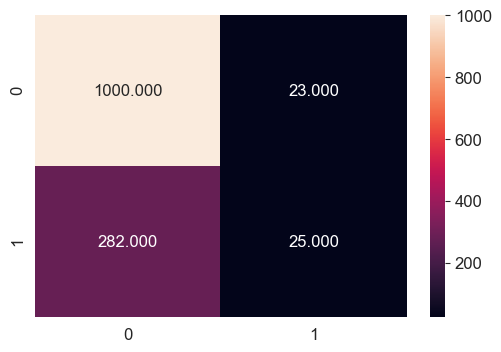

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1023
           1       0.52      0.08      0.14       307

    accuracy                           0.77      1330
   macro avg       0.65      0.53      0.50      1330
weighted avg       0.72      0.77      0.70      1330



In [215]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
y_pred = best_nb.predict(scale_test)
print("F1 Macro ==>",f1_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.3f')
plt.show()
print("Classification Report")
print(classification_report(y_test,y_pred))

### 4.2.4 Finding best threshold for f1 macro

In [216]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
yhat = best_nb.predict_proba(scale_test)
probs = yhat[:, 1]
thresholds = np.arange(0, 1, 0.001)
scores = [f1_score(y_test, to_labels(probs, t),average='macro') for t in thresholds]
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.277, F-Score=0.59628


# 4.3 Random Forest

### 4.3.1 Hyperparamerter Tuning of Model

In [217]:
%%time
MOD = RandomForestClassifier(class_weight="balanced") 
m_params = { 
                    "n_estimators" : np.linspace(2, 500, 500, dtype = "int"),  
                    "max_depth": [5, 20, 30, None], 
                    "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, 20, None],
                    "oob_score": [True],
                    "bootstrap": [True]
                    
            }
random_search = RandomizedSearchCV(MOD,
                                   param_distributions = m_params, 
                                   n_iter = 20,
                                   scoring = "f1_macro",
                                   return_train_score = True,
                                   random_state = 42,
                                   cv = 5,
                                    verbose = 3) 

#trains and optimizes the model
random_search.fit(scale_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=44, n_estimators=459, oob_score=True;, score=(train=0.577, test=0.531) total time=   1.9s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=44, n_estimators=459, oob_score=True;, score=(train=0.585, test=0.557) total time=   1.9s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=44, n_estimators=459, oob_score=True;, score=(train=0.581, test=0.566) total time=   1.8s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=44, n_estimators=459, oob_score=True;, score=(train=0.594, test=0.545) total time=   1.9s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=None, min_samples_split=44, n_estimators=459, oob_score=True;, score=(train=0.593, test=0.552) total time=   1.8s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=44, n_estimat

[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_split=25, n_estimators=338, oob_score=True;, score=(train=0.795, test=0.574) total time=   1.1s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=None, min_samples_split=2, n_estimators=103, oob_score=True;, score=(train=1.000, test=0.507) total time=   0.8s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=None, min_samples_split=2, n_estimators=103, oob_score=True;, score=(train=1.000, test=0.488) total time=   0.8s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=None, min_samples_split=2, n_estimators=103, oob_score=True;, score=(train=1.000, test=0.495) total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=None, min_samples_split=2, n_estimators=103, oob_score=True;, score=(train=1.000, test=0.496) total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=None, min_samples_split=2, n_estimators=103, oob_score=True;, score=(train=1.000, test=0

[CV 5/5] END bootstrap=True, max_depth=30, max_features=20, min_samples_split=9, n_estimators=366, oob_score=True;, score=(train=nan, test=nan) total time=   0.0s
Wall time: 1min 44s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=20,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [5, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', 10, 20,
                                                         None],
                                        'min_samples_split': array([ 2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44...
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
       482, 483, 484, 485, 486, 487, 488,

### 4.3.2 Best Parameters of Random Forest

In [219]:
# summarize
print('Mean Accuracy: %.3f' % random_search.best_score_)
print('Config: %s' % random_search.best_params_)

Mean Accuracy: 0.572
Config: {'oob_score': True, 'n_estimators': 469, 'min_samples_split': 27, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


### 4.3.3 Fitting Random Forest with best Hyper parameters

In [220]:
rf_best = RandomForestClassifier(oob_score =  True, n_estimators =  103, min_samples_split = 2, max_features = None, max_depth= None, bootstrap = True, class_weight="balanced")
rf_best.fit(scale_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       n_estimators=103, oob_score=True)

### 4.3.4 Evaluating on Test Data

F1 Macro ==> 0.15577889447236182


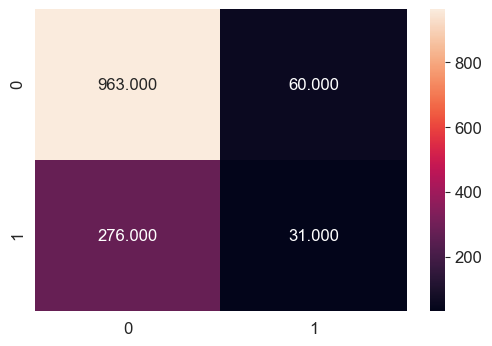

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1023
           1       0.34      0.10      0.16       307

    accuracy                           0.75      1330
   macro avg       0.56      0.52      0.50      1330
weighted avg       0.68      0.75      0.69      1330



In [221]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
y_pred = rf_best.predict(scale_test)
print("F1 Macro ==>",f1_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.3f')
plt.show()
print("Classification Report")
print(classification_report(y_test,y_pred))

### 4.3.5 Finding best threshold for f1 macro

In [222]:
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

yhat = rf_best.predict_proba(scale_test)
probs = yhat[:, 1]
thresholds = np.arange(0, 1, 0.001)
scores = [f1_score(y_test, to_labels(probs, t),average='macro') for t in thresholds]
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.301, F-Score=0.56366


# 4.4 Stacking

### 4.4.1 Stacking Random Forest and Logistic Regression

In [223]:
from mlxtend.classifier import StackingClassifier
m_classifier=LogisticRegression(random_state=0)

sclf = StackingClassifier(classifiers = [best_lr,rf_best], meta_classifier=m_classifier)

In [224]:
sclf.fit(scale_train,y_train)

StackingClassifier(classifiers=[LogisticRegression(C=0.1,
                                                   class_weight='balanced',
                                                   solver='newton-cg'),
                                RandomForestClassifier(class_weight='balanced',
                                                       max_features=None,
                                                       n_estimators=103,
                                                       oob_score=True)],
                   meta_classifier=LogisticRegression(random_state=0))

### 4.4.2 Evaluating on Test Data

F1 Macro ==> 0.16793893129770995


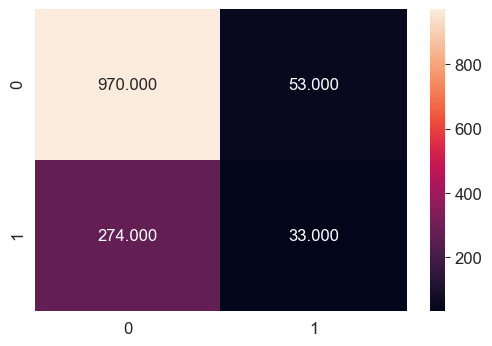

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1023
           1       0.38      0.11      0.17       307

    accuracy                           0.75      1330
   macro avg       0.58      0.53      0.51      1330
weighted avg       0.69      0.75      0.70      1330



In [225]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
y_pred = sclf.predict(scale_test)
print("F1 Macro ==>",f1_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.3f')
plt.show()
print("Classification Report")
print(classification_report(y_test,y_pred))

# 4.5 Light GBM

### 4.5.1 Hyperparamerter Tuning of Model

In [185]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [186]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [187]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100
#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='f1_macro',
    cv=5,
    refit=True,
    random_state=314,
    verbose=True)

In [188]:
%%time
gs.fit(scale_train, y_train, **fit_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[100]	valid's auc: 0.56496
[100]	valid's auc: 0.571083
[100]	valid's auc: 0.56631
[100]	valid's auc: 0.566786
[100]	valid's auc: 0.558665
[100]	valid's auc: 0.568058
[100]	valid's auc: 0.565067
[100]	valid's auc: 0.564279
Wall time: 11.5 s


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(metric='None', n_estimators=5000,
                                            n_jobs=4, random_state=314,
                                            silent=True),
                   n_iter=100,
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AA3AE99FA0>,
                                        'min_child_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AA468E2640>,
                                        'min_child_weight': [1e-05, 0.001, 0.01,
                                                             0.1, 1, 10.0,
                                                             100.0, 1000.0,
                                                             10000.0],
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001AA468E2130>,
                              

### 4.5.2 Best Parameters of Light GBM

In [189]:
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

Best score reached: 0.4756520855248162 with params: {'colsample_bytree': 0.6377497065362651, 'min_child_samples': 323, 'min_child_weight': 0.1, 'num_leaves': 10, 'reg_alpha': 100, 'reg_lambda': 0.1, 'subsample': 0.9071147321063562} 


In [191]:
opt_parameters = {'colsample_bytree': 0.952164731370897, 'min_child_samples': 111, 'min_child_weight': 0.01, 'num_leaves': 38, 'reg_alpha': 0, 'reg_lambda': 0.1, 'subsample': 0.3029313662262354}

### 4.5.3 Fitting Light GBM with best Hyper parameters

In [192]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

LGBMClassifier(colsample_bytree=0.952164731370897, metric='None',
               min_child_samples=111, min_child_weight=0.01, n_estimators=5000,
               n_jobs=4, num_leaves=38, random_state=314, reg_alpha=0,
               reg_lambda=0.1, silent=True, subsample=0.3029313662262354)

### 4.5.4 Fitting optimal weights for Light GBM 

In [193]:
gs_sample_weight = GridSearchCV(estimator=clf_sw, 
                                param_grid={'scale_pos_weight':[1,2,6,12]},
                                scoring='f1_macro',
                                cv=5,
                                refit=True,
                                verbose=True)

In [229]:
gs_sample_weight.fit(X_train, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs_sample_weight.best_score_, gs_sample_weight.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score reached: 0.5188415994173301 with params: {'scale_pos_weight': 6} 


### 4.5.5 Fitting Light GBM with best Hyper parameters

In [195]:
onfigure locally from hardcoded values
clf_final = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_final.set_params(**opt_parameters)

#Train the final model with learning rate decay
clf_final.fit(X_train, y_train, **fit_params)

LGBMClassifier(colsample_bytree=0.952164731370897, metric='None',
               min_child_samples=111, min_child_weight=0.01, n_estimators=5000,
               n_jobs=4, num_leaves=38, random_state=314, reg_alpha=0,
               reg_lambda=0.1, silent=True, subsample=0.3029313662262354)

### 4.5.5 Evaluating on Test Data

F1 Macro ==> 0.0


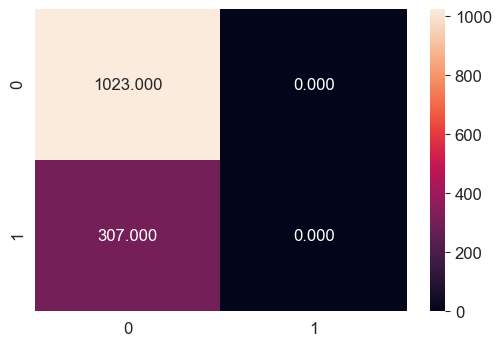

Classification Report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1023
           1       0.00      0.00      0.00       307

    accuracy                           0.77      1330
   macro avg       0.38      0.50      0.43      1330
weighted avg       0.59      0.77      0.67      1330



In [228]:
from sklearn.metrics import f1_score, confusion_matrix,classification_report
y_pred = gs_sample_weight.predict(scale_test)
print("F1 Macro ==>",f1_score(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='.3f')
plt.show()
print("Classification Report")
print(classification_report(y_test,y_pred))

## 4.5.6 Feature Importance

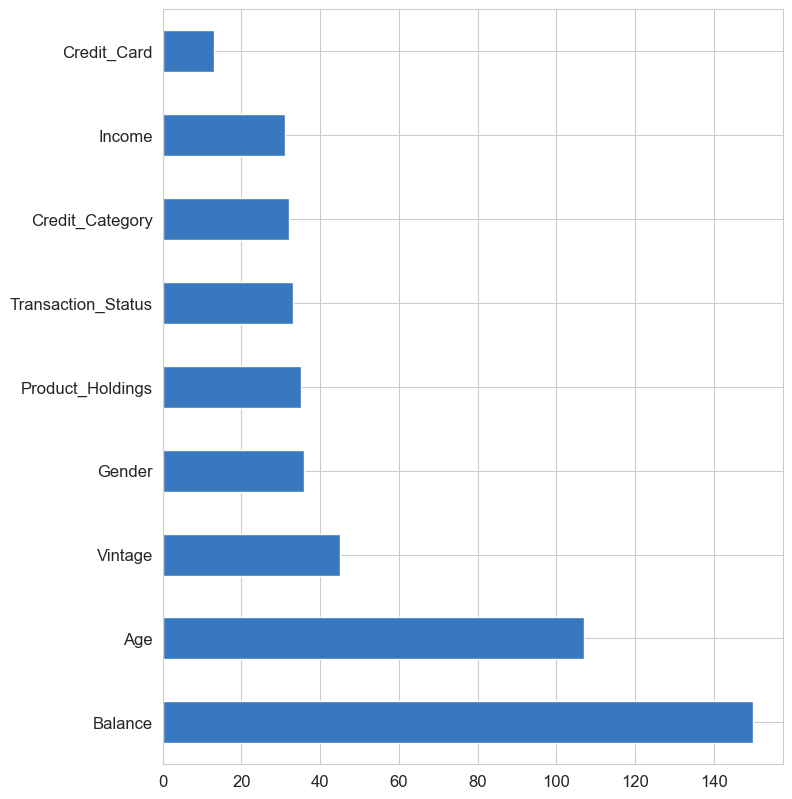

In [197]:
feat_imp = pd.Series(clf_final.feature_importances_, index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))
plt.show()

### Observation : Logistic Regression is giving highest F1 Macro result

# 5. Feature Selection + final model

### Remvoving Credit_card feature as it has lowest score of all of them

In [230]:
df = pd.read_csv("D:/github files/Churn_prediction_hackathon/original_data/train_PDjVQMB.csv").drop(['ID','Credit_Card'],1)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df.Gender= label_encoder.fit_transform(df.Gender)
df.Income = label_encoder.fit_transform(df.Income)
df.Credit_Category = label_encoder.fit_transform(df.Credit_Category)
df.Product_Holdings = label_encoder.fit_transform(df.Product_Holdings)
df.Vintage = label_encoder.fit_transform(df.Vintage)

X = df.drop("Is_Churn",1)
y = df.Is_Churn
cols = list(X.columns)
# scalar = StandardScaler()
# scale_train = pd.DataFrame(scalar.fit_transform(X),columns=cols)
scale_train = X
best_lr = LogisticRegression(class_weight="balanced", C= 0.1, max_iter = 100, penalty = 'l2', solver = 'newton-cg')
best_lr.fit(scale_train,y)
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
# predict probabilities
yhat = best_lr.predict_proba(scale_train)
probs = yhat[:, 1]
import numpy as np
from sklearn.metrics import f1_score
thresholds = np.arange(0, 1, 0.001)
scores = [f1_score(y, to_labels(probs, t),average='macro') for t in thresholds]
# get best threshold
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.572, F-Score=0.59580


# 6. Submitting Test File

In [231]:
df = pd.read_csv("D:/github files/Churn_prediction_hackathon/original_data/test_lTY72QC.csv")
ID = df.ID
df = df.drop(['ID','Credit_Card'],1)
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
df.Gender= label_encoder.fit_transform(df.Gender)
df.Income = label_encoder.fit_transform(df.Income)
df.Credit_Category = label_encoder.fit_transform(df.Credit_Category)
df.Product_Holdings = label_encoder.fit_transform(df.Product_Holdings)
#test = scalar.transform(df)
test = df
pred = (best_lr.predict_proba(test)[:,1]>=0.572).astype(int) # set threshold as 0.3
# pred = log_reg.predict(test)
print(pd.Series(pred).value_counts())
sub = pd.read_csv("D:/github files/Churn_prediction_hackathon/original_data/sample_OoSmYo5.csv")
sub.Is_Churn = pred
sub.to_csv("sample2.csv",index=False)

0    2119
1     732
dtype: int64
